<a href="https://colab.research.google.com/github/Sergrey5571/Sergrey5571/blob/main/%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_LITGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание и загрузка библиотек


1. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределения грузов по поездам:

А. Поезда: 1, 12, 72, 4, 55, 1

Б. Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

2. Решите задачу расстановки грузов по поездам с дополнительным условием: нужно заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):

А. Поезда: 10, 10, 10, 12, 12, 12

Б. Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

In [ ]:
import random as random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
%matplotlib inline

# Новый раздел



---
посмотрим на условие, что нам предлагают


In [ ]:
train = np.array([1, 12, 72, 4, 55, 1]) # поезда
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8]) # отдельный груз
print(train.shape)
print(size.shape)
print(train.sum())
print(size.sum())
size

(6,)
(18,)
145
145


array([ 1,  1,  1,  1,  4,  3,  3,  3,  1, 27, 31,  7,  7, 11, 22,  7,  7,
        8])

в 6 поездов нужно засунуть 18 грузов, а вместимость вагонов и масса грузов одинаковая

---





---
начинаю с малого:


In [ ]:
def getSurvPopul(popul, val, nsurv, reverse):
  newpopul = [] # пустой массив для новой популяции
  sval = sorted(val, reverse=reverse) # сортировка текущих значений в зависимости от поиска результатов
  for i in range(nsurv):
    index =val.index(sval[i])
    newpopul.append(popul[index]) # тут хитро, из текущей популяции, добавляем отсортированные от nsurv и сортированных sval
  return newpopul, sval


In [ ]:
def getParents(curr_popul, nsurv):
  indexp1 = random.randrange(0, nsurv) # ==random.randint(0, nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1

  indexp2 = random.randrange(0, nsurv)
  botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
  botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
  return botp1, botp2 # оба бота


In [ ]:
def crossPointFrom2Parents(botp1, botp2, j):
  pindex = random.random() # от 0 до 1
  if pindex < 0.5:
    x = botp1[j]
  else:
    x = botp2[j]
  return x

# Запустим

0   167.52   [46, 54, 64, 68, 86, 90, 106, 112, 112, 114]
1   120.92   [24, 46, 50, 54, 58, 58, 60, 64, 68, 76]
2   97.82   [24, 34, 34, 38, 44, 46, 46, 50, 50, 52]
3   90.2   [24, 30, 30, 34, 34, 38, 44, 44, 46, 46]
4   83.08   [18, 24, 28, 30, 30, 32, 34, 34, 34, 38]
5   82.36   [18, 18, 24, 28, 30, 30, 30, 32, 32, 34]
6   81.2   [18, 18, 24, 28, 30, 30, 30, 30, 32, 32]
7   77.62   [16, 18, 18, 24, 24, 26, 26, 26, 28, 28]
8   80.62   [16, 18, 18, 22, 24, 24, 24, 26, 26, 26]
9   81.22   [8, 16, 18, 18, 22, 24, 24, 24, 24, 26]
10   77.34   [8, 16, 18, 18, 22, 24, 24, 24, 24, 26]
11   81.5   [8, 16, 18, 18, 22, 24, 24, 24, 24, 24]
12   73.6   [8, 16, 18, 18, 20, 22, 24, 24, 24, 24]
13   74.42   [8, 16, 18, 18, 20, 22, 24, 24, 24, 24]
14   76.46   [8, 16, 18, 18, 20, 22, 22, 22, 24, 24]
15   76.54   [8, 16, 18, 18, 18, 20, 22, 22, 22, 24]
16   76.88   [8, 16, 18, 18, 18, 20, 22, 22, 22, 22]
17   74.14   [8, 16, 18, 18, 18, 18, 20, 20, 22, 22]
18   73.96   [8, 16, 18, 18, 18, 18, 20, 20, 

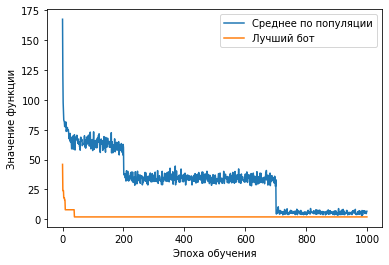

In [ ]:
n = 100 # число ботов, пока так поставлю
nsurv = 20 # тоже пока так/выжившие
nnew = n - nsurv #для полной комплекции потом. новые
epohs = 1000 # кол-во эпох 
mut = 0.4 # мутация

l = size.shape[0] # кол-во грузов
trains = train.shape[0] # кол-во поездов
popul = [] # популяция
val = [] # значение ботов

plotmeanval = [] #значения для графика по среднему значению
plotminval = [] # также по минимальнуму значению

for i in range(n):
  popul.append([]) # будет бот
  for j in range(l):
    popul[i].append(random.randrange(0, trains)) #  чтобы мозги себе не пудрить с методом randint, здесь по практикуму не удобен

for it in range(epohs):
  if (it==200):
    mut = 0.2
  if (it==700):
    mut = 0.02
  
  val = []
  for i in range(n):
    bot = popul[i]
    trainfill = np.array([0, 0, 0, 0, 0, 0])# это пригодится 
    for j in range(l):
      trainfill[bot[j]] += size[j] #  тут запомнить .. важно.  плюсуем бот  к размеру
  
    f = 0 # обнуляю, пока не понял чего

    for t in range(trains): 
      f += abs(train[t] - trainfill[t]) #  ошибка складывается постепенно из разницы реальной вместимостью и вместимомтью бота 
    val.append(f) #  добавляем
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # с реверсом попробую для эксперимента , что получится .. худшие чтоль
  print(it, " ", sum(val) / len(val), " ", sval[0:10]) # Выводим 10 лучших ботов
  plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
  plotminval.append(sval[0]) # Добавляем минимальное значение в список

  for i in range(nnew): #  по выше указанным значением которые заполнять n-nsurv
    botp1, botp2 = getParents(newpopul, nsurv) # два родителя как в HTML
    newbot = [] # Массив для нового бота
    
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j) #  колаб молодец подсказывает, что писать 
      if (random.random()< mut):
        x = random.randrange(0, trains)
      newbot.append(x) # тут главное не потеряться в отступах
    newpopul.append(newbot) # бот в новую популяцию, данное значение идёт из функции , а добавляется из цикла нового значения бота Х
  popul = newpopul # пишется на вверх в popul.append([]),  чтобы потом себе при просмотре в висок пулю не пускать

      # выходим из всех циклов и вернёмся в начало функции, это про отступы
#тут понятно
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()
# ну точно не получится , смотря с какого раза

  




ДА ЛАДНО. С ПЕРВОГО РАЗА ЗАПУСТИЛАСЬ(вручную). теперь смотрю, что сделать нужно. Судя потому, что вижу, ничего делать не нужно, все в нулях

---



# реально



---
смотрим реально.


In [ ]:
for i in range(10):
  print(popul[i])

[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
[1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]


In [ ]:
bot = popul[0] 
print ('Значения лучшего бота:', bot) 

trainfill = np.zeros(trains, dtype = 'int16') # Массив заполненности поездов,указывал выше 6 нулей
for j in range(l): #  по длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j], к нулям прибаляем значения бота по размеру

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)

Значения лучшего бота: [1, 3, 0, 2, 4, 4, 3, 1, 2, 2, 4, 4, 2, 4, 2, 2, 2, 1]
Вместимость поездов по боту: [ 1 12 72  4 56  0]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


array([ 1,  1,  1,  1,  4,  3,  3,  3,  1, 27, 31,  7,  7, 11, 22,  7,  7,
        8])

In [ ]:
ind = 3
[size [z] if i==ind else '' for z, i in enumerate(bot)] # вот спасибо лектору, 

['', 1, '', '', '', '', 3, '', '', '', '', '', '', '', '', '', '', '']

# Распределение

In [ ]:
train = np.array([9, 10, 11, 8, 14, 14]) # поезда
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) # отдельный груз
print(train.shape)
print(size.shape)
print(train.sum())
print(size.sum())

d = int(size.sum()/len(train)) #  среднее распределение по вагонам 
print(d)
size


(6,)
(18,)
66
54
9


array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])

In [ ]:
l = size.shape[0]       # Длина бота(количество единиц груза) 
trains = train.shape[0] # Количество вагонов поезда

bot = [] # пустой список 

for i in range(l):
    gen = random.randint(0, trains - 1)
    bot.append(gen)

print('Номера вагонов для распределения грузов', bot)

Номера вагонов для распределения грузов [0, 1, 3, 3, 0, 0, 3, 5, 5, 1, 5, 2, 0, 2, 5, 5, 2, 0]


In [ ]:
f = 0 # Обнуляем ошибку i-го бота 

# Проходим по всем вагонам поезда
for t in range(trains): 
    
    # сумируем ошибку по каждому вагону по i-му боту 
    f += abs(d - trainfill[t]) #  тут подгонка конечно, но в данном случае сработает

print('Суммарная ошибка по заполняемости вагонов' , f)

Суммарная ошибка по заполняемости вагонов 135


In [ ]:
# Массив, хранящий заполняемость каждого вагона поезда
trainfill = np.array([0, 0, 0, 0, 0, 0 ]) 

# Проходим по всей длине бота 
for j in range(l): 
    
    idx = bot[j] # получаем индекс вагона из гена бота
    # добавляеи груз по номеру j из списка грузов в вагон с номером idx
    trainfill[idx] += size[j]

print('План зарузки по вагонам', trainfill)
print('Обший плана загрузки', trainfill.sum()) 

План зарузки по вагонам [15  4 13  4  0 18]
Обший плана загрузки 54


0   212.68   [18, 106, 114, 114, 116, 116, 116, 118, 120, 120]
1   203.76   [18, 106, 108, 112, 112, 114, 114, 116, 116, 116]
2   178.52   [18, 106, 108, 110, 110, 112, 112, 112, 114, 114]
3   179.94   [18, 106, 108, 110, 110, 110, 110, 112, 112, 112]
4   185.06   [14, 18, 20, 104, 106, 108, 110, 110, 110, 110]
5   177.42   [12, 14, 16, 18, 20, 104, 106, 108, 108, 108]
6   160.24   [12, 12, 14, 14, 14, 16, 18, 18, 18, 20]
7   175.68   [8, 12, 12, 12, 14, 14, 14, 14, 16, 16]
8   162.28   [8, 10, 12, 12, 12, 12, 14, 14, 14, 14]
9   165.3   [8, 10, 12, 12, 12, 12, 14, 14, 14, 14]
10   157.48   [8, 10, 12, 12, 12, 12, 12, 14, 14, 14]
11   163.64   [8, 10, 12, 12, 12, 12, 12, 12, 14, 14]
12   163.16   [8, 10, 12, 12, 12, 12, 12, 12, 12, 14]
13   173.66   [8, 10, 12, 12, 12, 12, 12, 12, 12, 14]
14   151.42   [8, 10, 12, 12, 12, 12, 12, 12, 12, 14]
15   153.6   [8, 10, 12, 12, 12, 12, 12, 12, 12, 14]
16   153.26   [8, 10, 12, 12, 12, 12, 12, 12, 12, 12]
17   153.36   [8, 10, 12, 12, 12, 12, 1

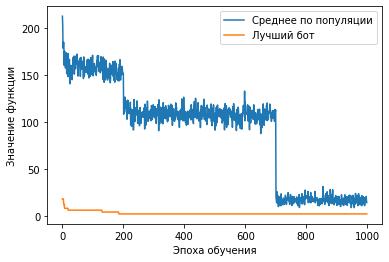

In [ ]:
n = 100 # число ботов, пока так поставлю
nsurv = 20 # тоже пока так/выжившие
nnew = n - nsurv #для полной комплекции потом. новые
epohs = 1000 # кол-во эпох 
mut = 0.4 # мутация

l = size.shape[0] # кол-во грузов
trains = train.shape[0] # кол-во поездов
popul = [] # популяция
val = [] # значение ботов

plotmeanval = [] #значения для графика по среднему значению
plotminval = [] # также по минимальнуму значению

for i in range(n):
  popul.append([]) # будет бот
  for j in range(l):
    popul[i].append(random.randrange(0, trains)) #  чтобы мозги себе не пудрить с методом randint, здесь по практикуму не удобен

for it in range(epohs):
  if (it==200):
    mut = 0.2
  if (it==700):
    mut = 0.02
  
  val = []
  for i in range(n):
    bot = popul[i]
    trainfill = np.array([0, 0, 0, 0, 0, 0])# это пригодится 
    for j in range(l):
      trainfill[bot[j]] += size[j] #  тут запомнить .. важно.  плюсуем бот  к размеру
  
    f = 0 # обнуляю, пока не понял чего

    for t in range(trains): 
      f += abs(d - trainfill[t]) #  ошибка складывается постепенно из разницы реальной вместимостью и вместимомтью бота
      if trainfill[t] > train[t]:
        f+=100
    val.append(f) #  добавляем
  newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # с реверсом попробую для эксперимента , что получится .. худшие чтоль
  print(it, " ", sum(val) / len(val), " ", sval[0:10]) # Выводим 10 лучших ботов
  plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
  plotminval.append(sval[0]) # Добавляем минимальное значение в список

  for i in range(nnew): #  по выше указанным значением которые заполнять n-nsurv
    botp1, botp2 = getParents(newpopul, nsurv) # два родителя как в HTML
    newbot = [] # Массив для нового бота
    
    for j in range(l):
      x = crossPointFrom2Parents(botp1, botp2, j) #  колаб молодец подсказывает, что писать 
      if (random.random()< mut):
        x = random.randrange(0, trains)
      newbot.append(x) # тут главное не потеряться в отступах
    newpopul.append(newbot) # бот в новую популяцию, данное значение идёт из функции , а добавляется из цикла нового значения бота Х
  popul = newpopul # пишется на вверх в popul.append([]),  чтобы потом себе при просмотре в висок пулю не пускать

      # выходим из всех циклов и вернёмся в начало функции, это про отступы
#тут понятно
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()
# ну точно не получится , смотря с какого раза

  




In [ ]:
for i in range(10):
  print(popul[i])

[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
[1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]


In [ ]:
bot = popul[0] 
print ('Значения лучшего бота:', bot) 

trainfill = np.zeros(trains, dtype = 'int16') # Массив заполненности поездов,указывал выше 6 нулей
for j in range(l): #  по длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j], к нулям прибаляем значения бота по размеру

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)

Значения лучшего бота: [1, 4, 4, 5, 0, 4, 0, 0, 0, 1, 5, 2, 3, 3, 4, 1, 5, 2]
Вместимость поездов по боту: [ 9  9  9  8  9 10]
Реальная вместимость поездов: [ 9 10 11  8 14 14]


**ВЫВОД **: первую задачу выполнил быстро, и с первого раза сработало. Во втором случае, трудность состояла не в том, чтобы понять, понимаю, но воплотить показалось очень трудным. Во второй части, добился результата,  теперь работает правильно, Спасибо А. Бугаенко  